# K Nearest Neighbors with Python

## How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

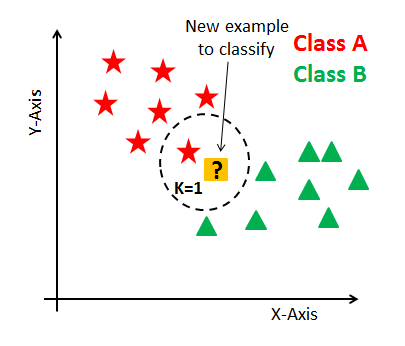

For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

- Calculate distance
- Find closest neighbors
- Vote for labels

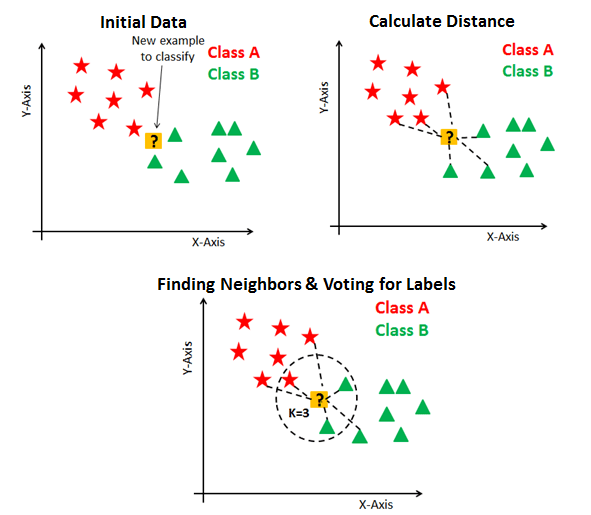

## Curse of Dimensionality 

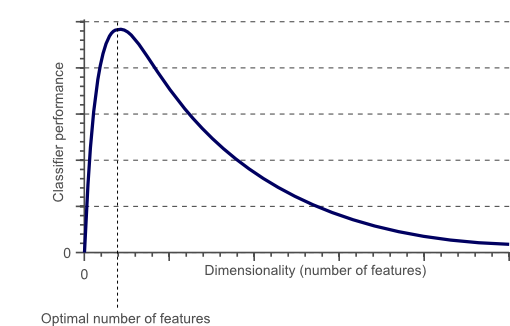

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

## How do you decide the number of neighbors in KNN? 

Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

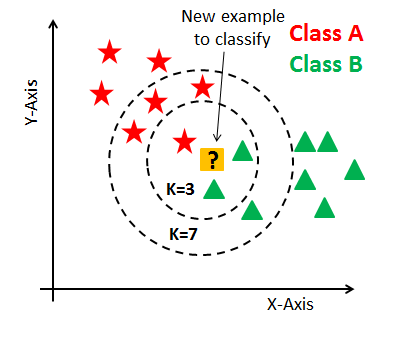

## Classifier Building in Python and Scikit-learn

you can use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [2]:
from sklearn import datasets

In [3]:
wine = datasets.load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).

This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. The dataset is available in the scikit-learn library, or you can also download it from the UCI Machine Learning Library.

## Import Libraries



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
X = wine.data
y = wine.target

In [12]:
X.shape, y.shape

((178, 13), (178,))

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) 

## Generating Model for K=3


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6851851851851852


## Generating Model for K=5


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


## Generating Model for K=7


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7407407407407407


In [21]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy. 

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

## How to improve KNN?

#### standardization in sklearn 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [24]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9629629629629629


## Parameter Tuning with Cross Validation 

In this section, we’ll explore a method that can be used to tune the hyperparameter K.

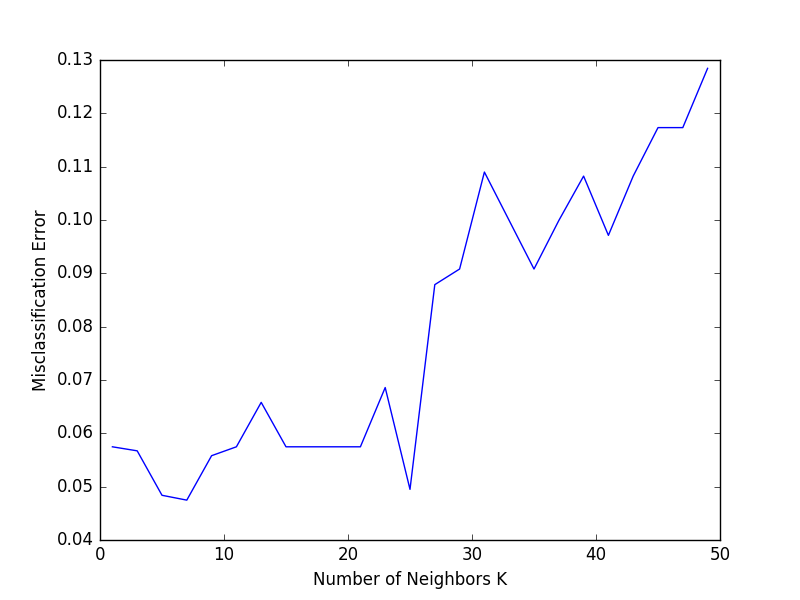

the best K is the one that corresponds to the lowest test error rate, so let’s suppose we carry out repeated measurements of the test error for different values of K. Inadvertently, what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as overfitting. Hence, touching the test set is out of the question and must only be done at the very end of our pipeline.

##### Using the test set for hyperparameter tuning can lead to overfitting. 

An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.

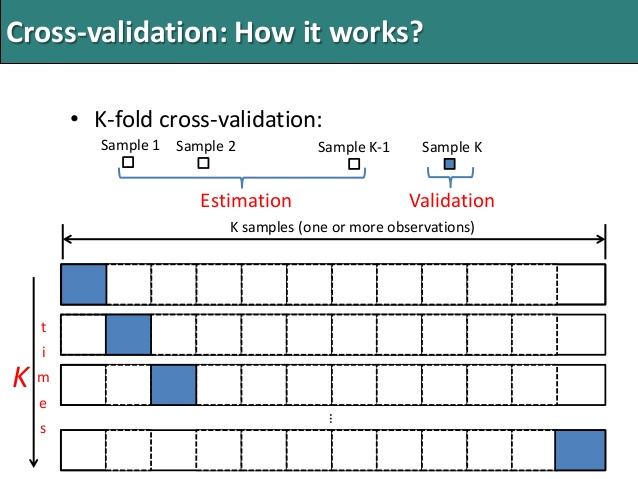

As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

#####   Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [28]:
cv_scores

[0.9439735982112143,
 0.954499914000688,
 0.9666322669418644,
 0.9663398692810456,
 0.97218782249742,
 0.9718954248366012,
 0.9666322669418644,
 0.9666322669418644,
 0.9725146198830409,
 0.9725146198830409,
 0.9725146198830409,
 0.9833333333333334,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9660130718954247,
 0.9718954248366012,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9610767113863089,
 0.9610767113863089,
 0.9551943584451325,
 0.9551943584451325,
 0.9551943584451325]

In [29]:
MSE = [1 - x for x in cv_scores]
MSE

[0.05602640178878571,
 0.04550008599931199,
 0.03336773305813556,
 0.03366013071895435,
 0.027812177502580027,
 0.028104575163398815,
 0.03336773305813556,
 0.03336773305813556,
 0.027485380116959113,
 0.027485380116959113,
 0.027485380116959113,
 0.016666666666666607,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.033986928104575265,
 0.028104575163398815,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.0389232886136911,
 0.0389232886136911,
 0.04480564155486755,
 0.04480564155486755,
 0.04480564155486755]

In [32]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is: ', optimal_k)

The optimal number of k is:  23


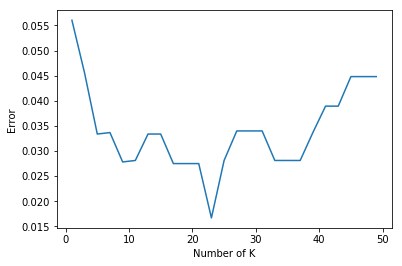

In [34]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)


knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9814814814814815
